<a href="https://colab.research.google.com/github/Aditi0102/ML-notebook/blob/main/ML_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
%tensorflow_version 2.x

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import cv2
from google.colab.patches import cv2_imshow
import math

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aditiagarwal01","key":"4c56849565c39183e765f285aeafe7d3"}\n'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d mohamedmustafa/real-life-violence-situations-dataset

 99% 3.56G/3.58G [01:07<00:00, 70.3MB/s]
100% 3.58G/3.58G [01:07<00:00, 57.1MB/s]


In [6]:
!unzip \*.zip  && rm *.zip
clear_output()

In [7]:
img_set = []
labels = []
count = 0
for i in range (1,100):
    videoFile = "/content/real life violence situations/Real Life Violence Dataset/Violence/V_%d.mp4" % i
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    print(f"Processing Violence_{i}")
    while True:
        ret, frame = cap.read()
        if ret is False:
            break
        img_set.append(cv2.resize(frame, (32,32)))
        labels.append(0)
    cap.release()
clear_output()
print("Done Training with Violence !!")

Done Training with Violence !!


In [8]:
count = 0
for i in range (1,100):
    videoFile = "/content/real life violence situations/Real Life Violence Dataset/NonViolence/NV_%d.mp4" % i
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    print(f"Reading File NonViolence_{i}")
    while True:
        ret, frame = cap.read()
        if ret is False:
            break
        img_set.append(cv2.resize(frame, (32,32)))
        labels.append(1)
    cap.release()
clear_output()
print("Done Training with Non-Violence !!")

Done Training with Non-Violence !!


In [9]:
img_set = np.array(img_set)
labels = np.array(labels)
class_names=["Violence", "Non-Violence"]
print(img_set.shape, labels.shape)

(26476, 32, 32, 3) (26476,)


In [23]:
train_images, test_images, train_labels, test_labels = train_test_split(img_set, labels, test_size=0.2, random_state=42)
train_images, test_images = train_images / 255.0, test_images / 255

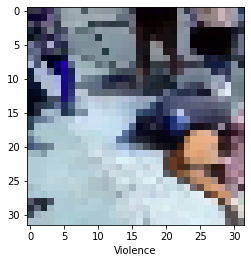

In [24]:
IMG_INDEX = 9  # change this to look at other images
plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX]])
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [26]:
print(train_labels[:10])

[0 0 0 1 1 0 0 1 0 0]


In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4,)

Epoch 1/4
662/662 [==============================] - 26s 38ms/step - loss: 0.2957 - accuracy: 0.8606
Epoch 2/4
662/662 [==============================] - 25s 38ms/step - loss: 0.0457 - accuracy: 0.9845
Epoch 3/4
662/662 [==============================] - 25s 38ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 4/4
662/662 [==============================] - 25s 38ms/step - loss: 0.0168 - accuracy: 0.9945


In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

166/166 - 2s - loss: 0.0071 - accuracy: 0.9974
0.9973564743995667
